In [2]:
import torch
import numpy
import matplotlib.pyplot as plt
import torchvision
import torch.nn as nn
import torch.nn.functional as F

In [6]:
TrainDataset = torchvision.datasets.MNIST("./data", train=True, transform=torchvision.transforms.ToTensor(), download=True)
TestDataset = torchvision.datasets.MNIST("./data", transform=torchvision.transforms.ToTensor(), download=True)

In [22]:
TrainDataset

AttributeError: 

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

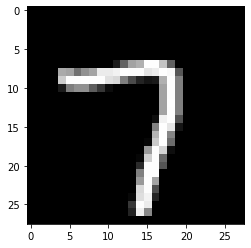

In [17]:
TrainDataLoader = torch.utils.data.DataLoader(TrainDataset, batch_size=16, shuffle=True)
TestDataLoader = torch.utils.data.DataLoader(TestDataset, batch_size=16, shuffle=True)

TrainIterator = iter(TrainDataLoader)
BatchOfSamples = TrainIterator.next()
Inputs, Labels = BatchOfSamples
#print(Inputs)

print(Inputs.size(), Labels.size())
plt.imshow(Inputs[0].squeeze(), cmap='gray')
print(Labels)

In [25]:
class model(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.layer1 = nn.Linear(input_dim, 512)
        self.layer2 = nn.Linear(512, 256)
        self.layer3 = nn.Linear(256, output_dim)
        
    #forward propagation
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        #output
        x = self.layer3(x) # no softmax
        
        return x

In [28]:
myModel = model(784, 10)

myModel

model(
  (layer1): Linear(in_features=784, out_features=512, bias=True)
  (layer2): Linear(in_features=512, out_features=256, bias=True)
  (layer3): Linear(in_features=256, out_features=10, bias=True)
)

In [29]:
loss = nn.CrossEntropyLoss() 

Optimizer = torch.optim.Adam(myModel.parameters(), lr = 0.01)

In [30]:
#Training
myModel.train()

for epoch in range(10): #for 10 epochs
    for batch in iter(TrainDataLoader):
        
        batch_inputs, batch_labels = batch
        batch_inputs = torch.reshape(batch_inputs, [16, 784])
        
        # gradients accumulate so we need to clear them out every iteration
        Optimizer.zero_grad()
        
        predictions = myModel(batch_inputs)
        
        #loss
        current_loss = loss(predictions, batch_labels)
        
        current_loss.backward()
        
        Optimizer.step() #Xnew = Xold = lr*grad
        
    print('Epoch {} Loss: {}'.format(epoch+1, current_loss))

Epoch 1 Loss: 0.7040073871612549
Epoch 2 Loss: 0.1005120649933815
Epoch 3 Loss: 0.0747077465057373
Epoch 4 Loss: 0.008824252523481846
Epoch 5 Loss: 0.028333965688943863
Epoch 6 Loss: 0.18435271084308624
Epoch 7 Loss: 0.04438037425279617
Epoch 8 Loss: 0.16082054376602173
Epoch 9 Loss: 0.15102404356002808
Epoch 10 Loss: 0.07937876135110855


In [23]:
# test
myModel.eval()

ip = torch.reshape(Inputs[0], [1,784])
pred = myModel(ip).argmax(axis=1)

plt.imshow(Inputs[0].squeeze(), cmap='gray')
print("prediction : ", pred.item())

NameError: name 'myModel' is not defined

In [35]:
correct = 0
total = 0
for data in iter(TestDataLoader):
    #each testing sample
    batch_inputs, batch_labels = data
    batch_inputs = torch.reshape(batch_inputs, [16, 784])
    
    #predicting outputs
    predictions = myModel(batch_inputs).argmax(axis=1)
    
    total += len(batch_labels)
    
    #total number of correct predictions
    correct += (predictions==batch_labels).sum().item()
    
print(100*correct/total,"%")

97.01166666666667 %


In [33]:
torch.save(myModel.state_dict(), "./myModel.pt")

In [26]:
myNewModel = model(784, 10)

modelWeights = torch.load("./myModel.pt")

myNewModel.load_state_dict(modelWeights)

<All keys matched successfully>

prediction :  7


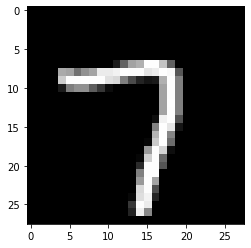

In [31]:
myNewModel.eval()

ip = torch.reshape(Inputs[0], [1,784])
pred = myNewModel(ip).argmax(axis=1)

plt.imshow(Inputs[0].squeeze(), cmap='gray')
print("prediction : ", pred.item())

In [32]:
correct = 0
total = 0
for data in iter(TestDataLoader):

    batch_inputs, batch_labels = data
    batch_inputs = torch.reshape(batch_inputs, [16, 784])
    

    predictions = myNewModel(batch_inputs).argmax(axis=1)
    
    total += len(batch_labels)
    

    correct += (predictions==batch_labels).sum().item()
    
print(100*correct/total,"%")

97.01166666666667 %
